# Boosting Classifier

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sys
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from utils import *

sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [175]:
def boost(data_set, max_depth_values=(5,), n_estimators_values=(100,), min_sample_split_values=(2,), trainning_sizes=(-1,)):
	x_train, y_train, x_test, y_test = get_data(data_set=data_set)
	max_depth_values = list(max_depth_values)
	n_estimators_values = list(n_estimators_values)
	min_sample_split_values = list(min_sample_split_values)
	data = []
	data_dict = {}
	for max_depth in max_depth_values:
		data_dict[max_depth] = {}
		for n_estimators in n_estimators_values:
			data_dict[max_depth][n_estimators] = {}
			for min_sample_split in min_sample_split_values:
				data_dict[max_depth][n_estimators][min_sample_split] = {}
				for train_limit in trainning_sizes:
					clf = GradientBoostingClassifier(
						max_depth=max_depth,
						n_estimators=n_estimators,
						min_samples_split=min_sample_split
					)
					clf.fit(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]).ravel())
					train_score = clf.score(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]))
					test_score = clf.score(X=x_test, y=y_test.ravel())
					data.append((test_score, train_score, max_depth, n_estimators, min_sample_split, train_limit))
					data_dict[max_depth][n_estimators][min_sample_split][train_limit] = {
						'score': test_score,
						'train_score': train_score
					}
	data_frame = pd.DataFrame(data, columns=["score", "train_score", "max_depth", "n_estimators", "min_sample_split", "train_limit"])
	data_dict_indexes = {
		'max_depth': 0,
		'n_estimators': 1,
		'min_sample_split': 2,
		'train_limit': 3,
		'score_type': 4
	}
	return data_frame, data_dict, data_dict_indexes

def run(data_set_name):
	if data_set_name == "gender":
		df, dd, ddi = boost(
			data_set_name,
			max_depth_values=[1, 2, 3, 4, 7, 10, 15, 20],
			n_estimators_values=range(1, 201, 50),
			min_sample_split_values=range(2, 18, 3),
			trainning_sizes=range(500, 2001, 500)
		)
	elif data_set_name == "creditcard":
		df, dd, ddi = boost(
			data_set_name,
			max_depth_values=[1, 2, 3, 4, 7, 10, 15, 20],
			n_estimators_values=range(1, 201, 50),
			min_sample_split_values=range(2, 33, 5),
			trainning_sizes=range(1000, 11001, 2500)
		)
	else:
		print("unknow dataset:", data_set_name)
		exit(1)
	if not os.path.exists("../stats"):
		os.makedirs("stats")
	df.to_csv(path_or_buf="../stats/boost_" + data_set_name + ".csv")
	with open("../stats/boost_" + data_set_name + "_dict.pikle", 'wb') as handle:
		pickle.dump(dd, handle, protocol=pickle.HIGHEST_PROTOCOL)
	with open("../stats/boost_" + data_set_name + "_dict_indexes.pikle", 'wb') as handle:
		pickle.dump(ddi, handle, protocol=pickle.HIGHEST_PROTOCOL)

# run("gender")
# run("creditcard")

## Gender Dataset

In [176]:
data_set_name = "gender"
with open("../stats/boost_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/boost_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

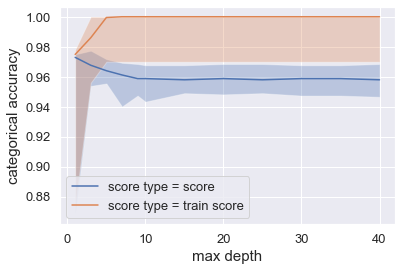

In [177]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

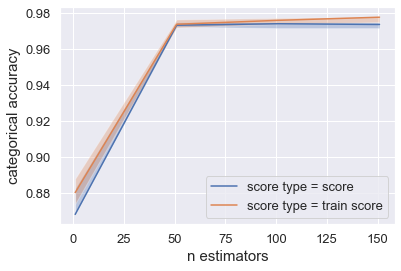

In [178]:
x_arg_name = 'n_estimators'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['max_depth'], 1)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

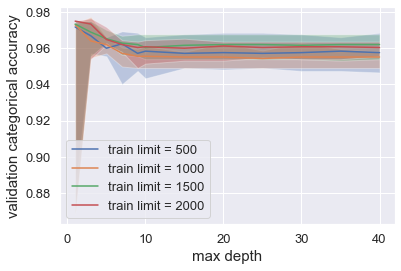

In [179]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score')]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

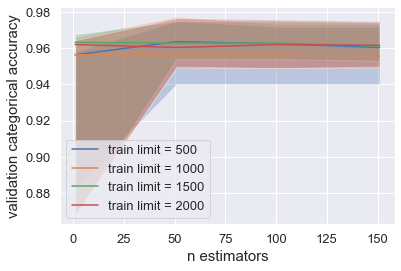

In [180]:
x_arg_name = 'n_estimators'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score')]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

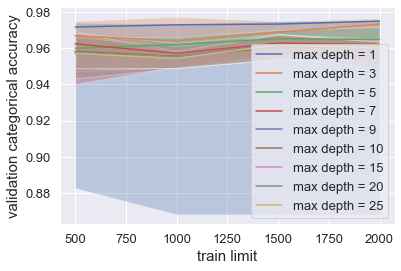

In [181]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'max_depth'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score'), (ddi['max_depth'], list(range(1,30)))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

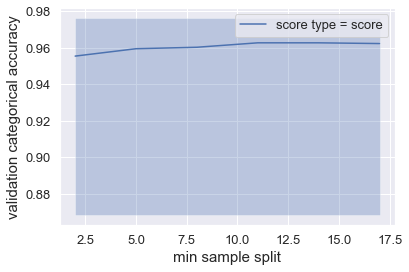

In [182]:
x_arg_name = 'min_sample_split'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score']), (ddi['train_limit'], 2000), (ddi['max_depth'], list(range(1,40)))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

## Creditcard Dataset

In [183]:
data_set_name = "creditcard"
with open("../stats/boost_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/boost_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

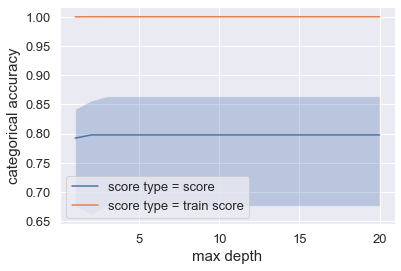

In [184]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

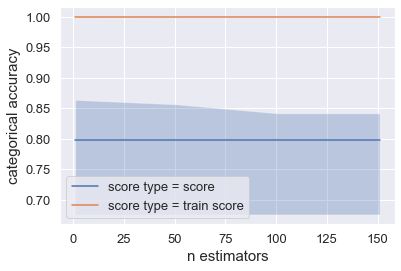

In [185]:
x_arg_name = 'n_estimators'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['max_depth'], 3)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

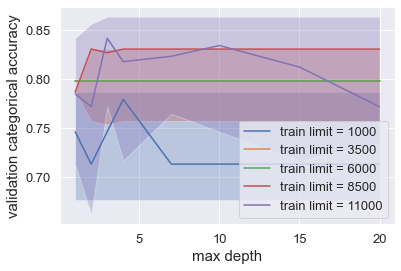

In [186]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score')]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

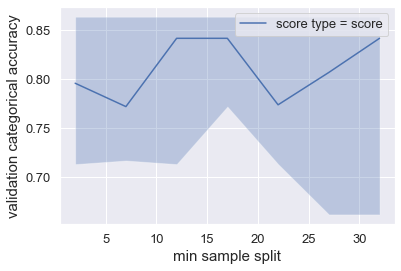

In [187]:
x_arg_name = 'min_sample_split'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score']), (ddi['train_limit'], 11000), (ddi['max_depth'], list(range(1,21)))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

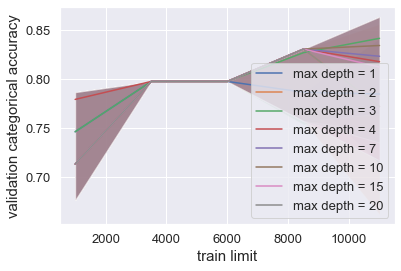

In [188]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'max_depth'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score'), (ddi['max_depth'], list(range(1,21)))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/boost_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()